<a href="https://colab.research.google.com/github/CrissRMFI/TA047R-2C2024-GRUPO08/blob/main/TA047R_TP2_GRUPO08_ENTREGA_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
import pandas as pd
import nltk
from nltk import sent_tokenize
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sns.set(style="whitegrid")

In [ ]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Pre - Procesamiento

### Separo los datos en variables de entrada y etiquetas

In [ ]:
X_train_title = train_set['title']
X_train_description = train_set['description']
X_train_project = train_set['project']
Y_train_point = train_set['storypoint']

In [ ]:
label_encoder = LabelEncoder()
train_set['project-encoder'] = label_encoder.fit_transform(train_set['project']).reshape(-1, 1)
test_set['project-encoder'] = label_encoder.fit_transform(test_set['project']).reshape(-1, 1)

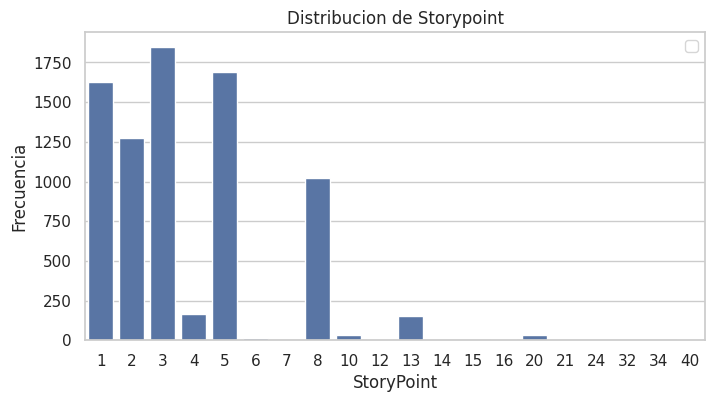

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=train_set,x='storypoint')
plt.xlabel('StoryPoint')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Storypoint')
plt.legend()
plt.show()

### Mostramos un sample de algunas descripciones, titulos y storypoint

In [ ]:
sample_train = train_set.sample(n=10)

for _, row in sample_train.iterrows():
    print("\033[1m"+"Título:\n"+"\033[0m", row["title"])
    print("\033[1m"+"Descripción:\n"+"\033[0m", row["description"])
    print("\033[1m"+ "Storypoint: " , row["storypoint"] )
    print("\n" + "-"*30 + "\n")


Título:
 Port mapping isolator should cleanup unknown orphan containers after all known orphan containers are recovered during recovery.
Descripción:
 Otherwise, the icmp/arp filter on host eth0 might be removed as a result of _cleanup if 'infos' is empty, causing subsequent '_cleanup' to fail on both known/unknown orphan containers.    {noformat}  I0612 17:46:51.518501 16308 containerizer.cpp:314] Recovering containerizer  I0612 17:46:51.520612 16308 port_mapping.cpp:1567] Discovered network namespace handle symlink ddcb8397-3552-44f9-bc99-b5b69aa72944 -> 31607  I0612 17:46:51.521183 16308 port_mapping.cpp:1567] Discovered network namespace handle symlink d8c48a4a-fdfb-47dd-b8d8-07188c21600d -> 41020  I0612 17:46:51.521883 16308 port_mapping.cpp:1567] Discovered network namespace handle symlink 8953fc7f-9fca-4931-b0cb-2f4959ddee74 -> 3302  I0612 17:46:51.522542 16308 port_mapping.cpp:1567] Discovered network namespace handle symlink 50f9986f-ebbc-440d-86a7-9fa1a7c55a75 -> 19805  I0612

### Eliminamos nombres de rutas y librerias

In [ ]:
import re

def clean_description(description):
    # Eliminar rutas de archivos y librerías
    description = re.sub(r'(/[\w./-]+)|([a-zA-Z]:\\[\w.\\-]+)', ' ', description)
    # Eliminar URLs
    description = re.sub(r'http[s]?://\S+', ' ', description)
    # Eliminar líneas de código (sencillas)
    description = re.sub(r'^\s*\$.*$', ' ', description, flags=re.MULTILINE)
    description = re.sub(r'^\s*#.*$', ' ', description, flags=re.MULTILINE)
    description = re.sub(r'`[^`]+`', ' ', description)
    # Eliminar caracteres especiales
    description = re.sub(r'[^a-zA-Z0-9\s]', ' ', description)  # Mantener solo letras, números y espacios
    # Opcional: Eliminar múltiples espacios en blanco
    description = re.sub(r'\s+', ' ', description).strip()  # Reemplazar múltiples espacios con uno solo y eliminar espacios al inicio y fin
    return description


In [ ]:
train_set['description'] = train_set['description'].map(lambda x: clean_description(x))
train_set['title'] = train_set['title'].map(lambda x: clean_description(x))
test_set['description'] = test_set['description'].map(lambda x: clean_description(x))
test_set['title'] = test_set['title'].map(lambda x: clean_description(x))

## Tokenizamaos por palabras

## Tokenizacion - NLTK - Stop Words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
model_word_tokenize = train_set.copy(deep=True)
tokens_title = model_word_tokenize['title'].map(lambda x: tokenize_and_remove_stopwords(x))
tokens_description = model_word_tokenize['description'].map(lambda x: tokenize_and_remove_stopwords(x))
mean_len_token_title = model_word_tokenize['title'].map(lambda x: np.mean([len(token) for token in tokenize_and_remove_stopwords(x)]))
mean_len_token_description = model_word_tokenize['description'].map(lambda x: np.mean([len(token) for token in tokenize_and_remove_stopwords(x)]))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
sample_df = model_word_tokenize.sample(10)

for _, row in sample_df.iterrows():
    print("\033[1m" + "Título:\n", row["title"])
    print("Descripción:\n", row["description"])
    print( "Storypoint: ", row["storypoint"])
    print("\n" + "-"*30 + "\n")

Título:
 Documentation for reactor ip source has conflicting information
Descripción:
 According to the documentation at http reactor ip one of the options available for this source is transport It s listed as having no default but the sample definition doesn t provide it yet appears to default to tcp The two should match up It might also be useful if the possible values for transport were listed I assume TCP and UDP
Storypoint:  1

------------------------------

Título:
 Update JDK version included in Studio installer to JDK7
Descripción:
 We currently include JDK6 in Studio installer Since we confirmed Studio and SDK work with JDK7 we should update the version
Storypoint:  5

------------------------------

Título:
 Design the UI for the Mac OSX installer
Descripción:
 Added an image of Xamarin installer and a screenshot from OSX Installer wiki page for a couple of examples of installer look and feel on Mac The bullet points for us would include something similar license prerequisit

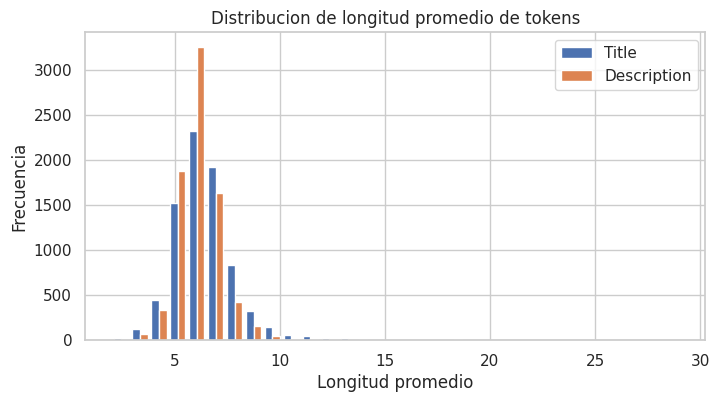

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist([mean_len_token_title, mean_len_token_description], bins=30, label=['Title', 'Description'])
plt.xlabel('Longitud promedio')
plt.ylabel('Frecuencia')
plt.title('Distribucion de longitud promedio de tokens')
plt.legend()
plt.show()

### Vectorizamos aplicando la técnica de TF-IDF y Bag Of Words

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

In [ ]:
def procesar_tfidf(data_set, train=True, vectorizer=None):

    data_set['title_description_lemmatized'] = (data_set['title'] + ' ' + data_set['description']).apply(lemmatize_text)


    if train:
        vectorizer = TfidfVectorizer()
        title_description_vec = vectorizer.fit_transform(data_set['title_description_lemmatized'])
    else:
        title_description_vec = vectorizer.transform(data_set['title_description_lemmatized'])


    project_encoder = data_set['project-encoder'].values.reshape(-1, 1)
    vec_tfidf = np.hstack((title_description_vec.toarray(), project_encoder))
    data_set['tfidf'] = list(vec_tfidf)

    return data_set, vectorizer


In [ ]:
def procesar_bow(data_set, train=True, vectorizer=None):

    data_set['title_description_lemmatized'] = (data_set['title'] + ' ' + data_set['description']).apply(lemmatize_text)


    if vectorizer is None:
        vectorizer = CountVectorizer(stop_words='english')

    if train:
        title_description_vec = vectorizer.fit_transform(data_set['title_description_lemmatized'])
    else:
        title_description_vec = vectorizer.transform(data_set['title_description_lemmatized'])


    project_encoder = data_set['project-encoder'].values.reshape(-1, 1)
    vec_bow = np.hstack((title_description_vec.toarray(), project_encoder))


    data_set['bow'] = list(vec_bow)

    return data_set, vectorizer


In [ ]:
train_set, vectorizer = procesar_tfidf(train_set, train=True)
test_set, _ = procesar_tfidf(test_set, train=False, vectorizer=vectorizer)

# XG Boost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
X_train = train_set['tfidf'].tolist()
y_train = train_set['storypoint']
X_test = test_set['tfidf'].tolist()

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

output = test_set[['id']].copy()
output['storypoint'] = y_pred

output.to_csv('td_idf_pred.csv', index=False)


In [ ]:
output = test_set[['id']].copy()
output['storypoint'] = y_pred.round()

output.to_csv('td_idf_pred_round.csv', index=False)


In [ ]:
import pickle

model_pkl_file = "XGBoost-TD-IDF.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)